# Introduction

In this file we are trying to implement an LSTM model for EUR/CAD exchange rate prediction

In [99]:
# General code to use to get our eur cad dataframe cleaned
import numpy as np
import pandas as pd
import yfinance as yf

eur_cad = yf.download('EURCAD=X', start='2015-01-01', end='2022-03-09')
eur_cad.to_csv('eur_cad.csv')
eur_cad = eur_cad.drop('Volume', axis=1) 
eur_cad

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2015-01-01,1.40496,1.40496,1.40496,1.40496,1.40496
2015-01-02,1.40433,1.41050,1.40220,1.40445,1.40445
2015-01-05,1.40944,1.41125,1.40210,1.40850,1.40850
2015-01-06,1.40330,1.40613,1.39960,1.40330,1.40330
2015-01-07,1.40530,1.40894,1.39769,1.40550,1.40550
...,...,...,...,...,...
2022-03-02,1.41635,1.41667,1.40367,1.41643,1.41643
2022-03-03,1.40538,1.40538,1.39664,1.40531,1.40531
2022-03-04,1.40207,1.40314,1.39208,1.40218,1.40218


In [114]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Load data
data = eur_cad

# Preprocess data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
X = []
y = []
for i in range(60, len(data)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])
X = np.array(X)
y = np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on testing set
y_pred = model.predict(X_test)
y_pred = np.repeat(y_pred, 5, axis=1)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_41 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_42 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_43 (LSTM)              (None, 50)              

ValueError: non-broadcastable output operand with shape (363,1) doesn't match the broadcast shape (363,5)

In [101]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [102]:
# Split the data into training and testing sets
train_data = eur_cad[:'2019'].values
test_data = eur_cad['2020':].values

In [103]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [104]:
# Define the training data sequence and labels
X_train = []
y_train = []
for i in range(60, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [105]:
# Reshape the training data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [106]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [107]:
# Compile the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
39/39 [==============================] - 8s 59ms/step - loss: 0.0291
Epoch 2/10
39/39 [==============================] - 2s 61ms/step - loss: 0.0039
Epoch 3/10
39/39 [==============================] - 2s 60ms/step - loss: 0.0033
Epoch 4/10
39/39 [==============================] - 2s 53ms/step - loss: 0.0031
Epoch 5/10
39/39 [==============================] - 2s 54ms/step - loss: 0.0030
Epoch 6/10
39/39 [==============================] - 2s 55ms/step - loss: 0.0029
Epoch 7/10
39/39 [==============================] - 2s 57ms/step - loss: 0.0028
Epoch 8/10
39/39 [==============================] - 2s 55ms/step - loss: 0.0026
Epoch 9/10
39/39 [==============================] - 2s 54ms/step - loss: 0.0025
Epoch 10/10
39/39 [==============================] - 2s 54ms/step - loss: 0.0024


In [109]:
# Prepare the test data for prediction
inputs = eur_cad[len(eur_cad) - len(test_data) - 60:].values
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [110]:
# Generate predictions on test data
predictions = model.predict(X_test)


18/18 [==============================] - 2s 20ms/step


In [111]:
predictions = np.repeat(predictions, 5, axis=1)

In [112]:
predictions = scaler.inverse_transform(predictions)

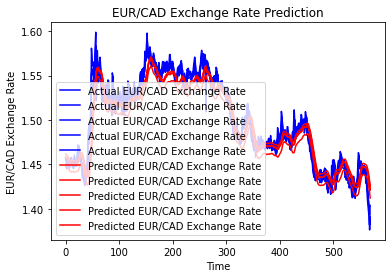

In [113]:
# Plot the predictions against the actual values
plt.plot(test_data, color='blue', label='Actual EUR/CAD Exchange Rate')
plt.plot(predictions, color='red', label='Predicted EUR/CAD Exchange Rate')
plt.title('EUR/CAD Exchange Rate Prediction')
plt.xlabel('Time')
plt.ylabel('EUR/CAD Exchange Rate')
plt.legend()
plt.show()

In [116]:
y_test

array([0.78263467, 0.76862821, 0.79491526, 0.79511428, 0.81884574,
       0.79551271, 0.81399966, 0.81974192, 0.8027482 , 0.83411318,
       0.80301369, 0.80852329, 0.75180066, 0.75936811, 0.75588311,
       0.77364007, 0.78372987, 0.74858115, 0.75561762, 0.74901243,
       0.79053408, 0.80361114, 0.79056732, 0.80473957, 0.78840977,
       0.79803506, 0.79707241, 0.78276722, 0.77626213, 0.78704908,
       0.79156281, 0.80198457, 0.79106506, 0.82545054, 0.83716691,
       0.83029622, 0.78558869, 0.78993663, 0.79488202, 0.78528997,
       0.77911644, 0.77885095, 0.78907369, 0.76647066, 0.80377692,
       0.82558309, 0.83510907, 0.86196034, 0.85840887, 0.84207907,
       0.84277583, 0.84463465, 0.85167112, 0.85867436, 0.84868387,
       0.70925028, 0.81655525, 0.84124936, 0.81831437, 0.83072789,
       0.80925368, 0.79162928, 0.79922996, 0.79355418, 0.76955762,
       0.74473096, 0.75817321, 0.75482076, 0.76982311, 0.72143116,
       0.75123645, 0.78240242, 0.7775231 , 0.76749977, 0.79255

In [118]:
predictions

array([[1.4579933, 1.4615715, 1.4490728, 1.4581918, 1.4581918],
       [1.4576174, 1.4612007, 1.4486947, 1.4578162, 1.4578162],
       [1.4571325, 1.4607221, 1.4482068, 1.4573315, 1.4573315],
       ...,
       [1.4318537, 1.4357839, 1.4227753, 1.4320704, 1.4320704],
       [1.4272504, 1.4312427, 1.4181443, 1.4274703, 1.4274703],
       [1.4213514, 1.4254233, 1.4122096, 1.4215755, 1.4215755]],
      dtype=float32)

In [119]:
mse = mean_squared_error(y_test, predictions)


ValueError: Found input variables with inconsistent numbers of samples: [363, 570]

In [121]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from keras.optimizers import Adam

In [125]:
#Initializing the classifier Network
classifier = Sequential()

#Adding the input LSTM network layer
classifier.add(LSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))

In [126]:
#Adding a second LSTM network layer
classifier.add(LSTM(128))

#Adding a dense hidden layer
classifier.add(Dense(64, activation='relu'))
classifier.add(Dropout(0.2))

#Adding the output layer
classifier.add(Dense(10, activation='softmax'))

In [127]:
#Compiling the network
classifier.compile( loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001, decay=1e-6),
              metrics=['accuracy'] )

#Fitting the data to the model
classifier.fit(X_train,
         y_train,
          epochs=3,
          validation_data=(X_test, y_test))

Epoch 1/3
46/46 [==============================] - 13s 172ms/step - loss: 0.2600 - accuracy: 6.9013e-04 - val_loss: 2.0266e-06 - val_accuracy: 0.0000e+00
Epoch 2/3
46/46 [==============================] - 6s 137ms/step - loss: 0.0126 - accuracy: 6.9013e-04 - val_loss: 4.6492e-06 - val_accuracy: 0.0000e+00
Epoch 3/3
46/46 [==============================] - 6s 135ms/step - loss: 0.0092 - accuracy: 6.9013e-04 - val_loss: 1.4820e-04 - val_accuracy: 0.0000e+00


In [128]:
test_loss, test_acc = classifier.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

12/12 [==============================] - 1s 41ms/step - loss: 1.4820e-04 - accuracy: 0.0000e+00
Test Loss: 0.0001482009975006804
Test Accuracy: 0.0


# Test

In [161]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [162]:
hist = eur_cad

In [163]:
eur_cad.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28',
               '2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-07', '2022-03-08'],
              dtype='datetime64[ns]', name='Date', length=1872, freq=None)

In [164]:
hist.index = pd.to_datetime(hist.index, unit='s')
# colonne cible
target_col = 'Close'

In [165]:
hist.head(5)

,Open,High,Low,Close,Adj Close
Date,,,,,
2015-01-01,1.40496,1.40496,1.40496,1.40496,1.40496
2015-01-02,1.40433,1.41050,1.40220,1.40445,1.40445
2015-01-05,1.40944,1.41125,1.40210,1.40850,1.40850
2015-01-06,1.40330,1.40613,1.39960,1.40330,1.40330
2015-01-07,1.40530,1.40894,1.39769,1.40550,1.40550


In [166]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(hist, test_size=0.2)

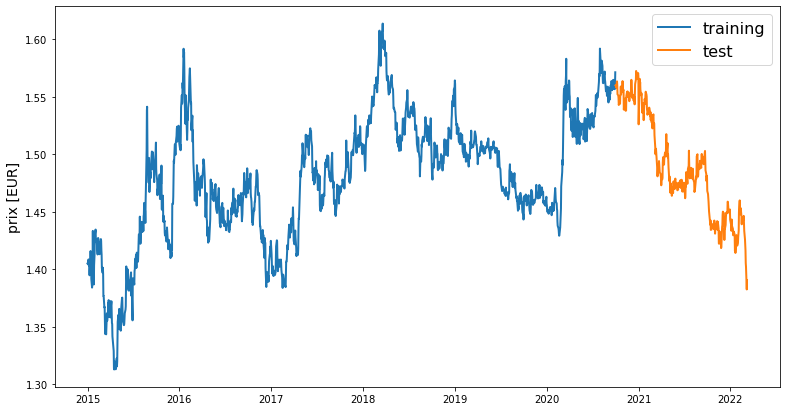

In [167]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('prix [EUR]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [168]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1
def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [169]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [170]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

In [171]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [172]:
from keras.layers import Dense, LSTM, Activation

[GridSearch](https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/)

In [173]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [174]:
train, test, X_train, X_test, y_train, y_test = prepare_data(hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)


In [175]:
model = build_lstm_model(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)


In [176]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/20
47/47 [==============================] - 3s 6ms/step - loss: 7.8320e-05
Epoch 2/20
47/47 [==============================] - 0s 6ms/step - loss: 3.5200e-05
Epoch 3/20
47/47 [==============================] - 0s 8ms/step - loss: 3.1746e-05
Epoch 4/20
47/47 [==============================] - 0s 8ms/step - loss: 2.8286e-05
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 2.7097e-05
Epoch 6/20
47/47 [==============================] - 0s 8ms/step - loss: 2.7705e-05
Epoch 7/20
47/47 [==============================] - 0s 8ms/step - loss: 2.5054e-05
Epoch 8/20
47/47 [==============================] - 0s 7ms/step - loss: 2.3965e-05
Epoch 9/20
47/47 [==============================] - 0s 8ms/step - loss: 2.4504e-05
Epoch 10/20
47/47 [==============================] - 0s 8ms/step - loss: 2.1946e-05
Epoch 11/20
47/47 [==============================] - 0s 9ms/step - loss: 2.1349e-05
Epoch 12/20
47/47 [==============================] - 0s 8ms/step - loss: 2.0906e-05
E

In [177]:
from sklearn.metrics import mean_absolute_error

In [178]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

12/12 [==============================] - 1s 4ms/step


0.0021467962235353125

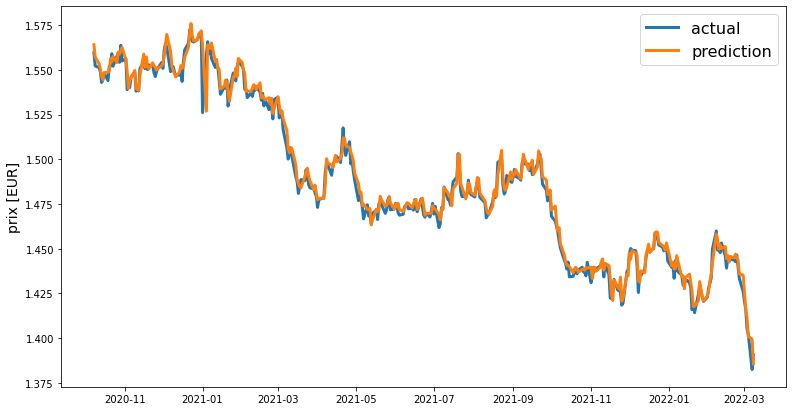

In [179]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)

In [ ]:
"""def train_test_validation_split(df, validation_size=0.6, validation_size=0.2):
    split_row = int(test_size * len(df))
    split_row_2 = len(df) - int(_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(hist, test_size=0.2)"""

# Test 4

In [190]:

scaler = MinMaxScaler()
training_data = scaler.fit_transform(eur_cad)
training_data

array([[0.30721246, 0.29277004, 0.33769921, 0.30643021, 0.30643021],
       [0.30512138, 0.31140885, 0.32859344, 0.30473638, 0.30473638],
       [0.32208187, 0.31393196, 0.32826347, 0.31818761, 0.31818761],
       ...,
       [0.2976204 , 0.28664654, 0.2952061 , 0.29719651, 0.29719651],
       [0.23160405, 0.25185875, 0.24337675, 0.23146669, 0.23146669],
       [0.26014796, 0.28910268, 0.28784927, 0.25840281, 0.25840281]])

In [191]:
X_train = [] 
Y_train = []

training_data.shape[0]

for i in range(60, training_data.shape[0]):

 X_train.append(training_data[i-60:i])

Y_train.append(training_data[i,0])

X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(1812, 60, 5)

In [200]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, LSTM, Dropout

#Initialize the RNN

model = Sequential() 
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))

model.add(Dropout(0.2)) 
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

model.add(Dropout(0.3)) 
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout(0.4)) 
model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dropout(0.5)) 
model.add(Dense(units =1))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 60, 50)            11000     
                                                                 
 dropout_44 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_64 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_45 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_65 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_46 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_66 (LSTM)              (None, 120)             

In [201]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [202]:
history= model.fit(X_train, Y_train, epochs = 20, batch_size =50, validation_split=0.1)

ValueError: Data cardinality is ambiguous:
  x sizes: 1630
  y sizes: 1
Make sure all arrays contain the same number of samples.

In [195]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

KeyError: 'val_loss'

In [196]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

NameError: name 'data_training' is not defined

In [ ]:
inputs = scaler.transform(df) inputs

In [ ]:
X_test = []

Y_test = []

for i in range (60, inputs.shape[0]):

    X_test.append(inputs[i-60:i]) Y_test.append(inputs[i, 0])

    X_test, Y_test = np.array(X_test), np.array(Y_test) X_test.shape, Y_test.shape

    Y_pred = regressor.predict(X_test) Y_pred, Y_test

scaler.scale_

# Retour
- test split training validation test (chronological data)
- gridsearch ou pipeline (pi)